In [169]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline
pd.options.display.max_rows = 10

In [170]:
#the data frame contains the following:
#likes - number of facebook likes of the film
#imdb - imdb rating of the film
#metacritic -  metacritic score of the film
#(director,writer,actor1,actor2,actor3) 
#         - number of facebook likes of the (director,writer,actor1,actor2,actor3) of a film
#
# All of the data are transformed by standardizing against films released during the same time period.

df = pd.DataFrame.from_csv('zscores.csv',header=0,index_col=None); df.head()

,director,imdb,likes,metacritic,writer,year,actor3,actor2,actor1
0,0.058511,1.036625,1.035670,1.637214,0.692924,2003,-3.173595,-3.972226,-3.136886
1,0.242825,0.358988,-3.163267,0.831485,0.695444,2005,-3.961961,-4.751953,-0.393670
2,0.055439,1.213035,1.024388,1.365871,-1.375858,2003,-3.173595,-3.363987,-4.088374
3,-2.484296,0.111921,-1.315556,-0.504497,-1.375858,2003,-3.173595,-3.588470,-4.227503
4,-1.703477,0.830522,-0.960428,0.945720,-1.205385,2006,-3.605762,-1.506756,-1.615972


# Exercise 3.1

In [171]:
y = df.imdb
X = np.ones([len(y),1])
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   imdb   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 04 Oct 2016   Prob (F-statistic):                nan
Time:                        11:43:41   Log-Likelihood:                -4712.3
No. Observations:                3321   AIC:                             9427.
Df Residuals:                    3320   BIC:                             9433.
Df Model:                           0                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -6.022e-13      0.017  -3.47e-11      1.000        -0.034     0.034
==============================================================================
Omnibus:                     1135.429   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4912.591
Skew:                          -1.614   Prob(JB):                         0.00
Kurtosis:                       8.008   Cond. No.                         1.00
==============================================================================
"""

The model has a very low t-value, and a coefficient of nearly 0. Since we are trying to predict a movie's imdb score based on the facebook popularity of all of the people involved in making it, we can interpret this as saying that when  all the people are average in popularity, we expect the movie to have an average IMDB rating (i.e. the model has no bias).

With the coefficient nearly zero, it simply predicts that the z-score of all movies will be nearly zero.

In [172]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.0


The r-squares score is not very good. In fact, it is 0, because we have extracted no information from the dataset with this model.

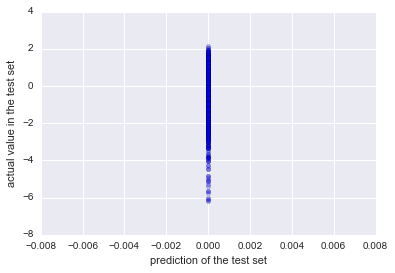

In [173]:
plt.scatter(y_pred, y, alpha = .3)
plt.xlabel('prediction of the test set')
plt.ylabel('actual value in the test set');

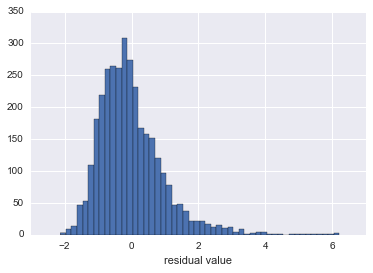

In [174]:
plt.hist(y_pred-y,bins = 50)
plt.xlabel('residual value');

Since the prediction is always going to be 0, the distribution of the reisual value is simply the distribution of the z-scores of our imdb scores.

# Exercise 3.2

In [179]:
y = df.imdb
ones = (df.director*0+1)
ones = ones.rename('bias')
X = pd.concat([ones, df.likes], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   imdb   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     1318.
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          2.35e-243
Time:                        11:44:24   Log-Likelihood:                -4156.9
No. Observations:                3321   AIC:                             8318.
Df Residuals:                    3319   BIC:                             8330.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
bias       -3.653e-12      0.015  -2.49e-10      1.000        -0.029     0.029
likes          0.5332      0.015     36.307      0.000         0.504     0.562
==============================================================================
Omnibus:                     1453.098   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10729.748
Skew:                          -1.920   Prob(JB):                         0.00
Kurtosis:                      10.924   Cond. No.                         1.00
==============================================================================
"""

In [180]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.284269546492


The r-squared score is a little better now than before.

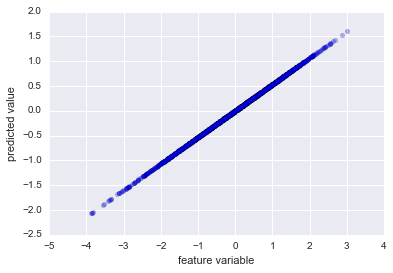

In [181]:
plt.scatter(X.iloc[:,1], y_pred, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('predicted value');

Since we are modelling a linear dependence of imdb ratings on the independent variable (i.e. director's facebook likes), the predictions of the imdb ratings falls on a line when plotted against the independent variable.

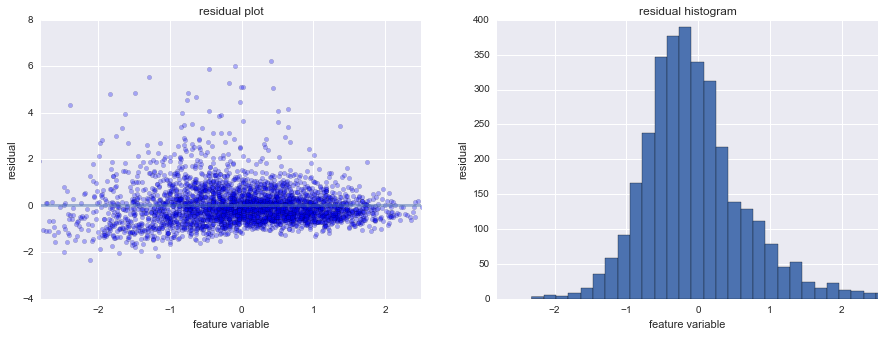

In [182]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.scatter(X.iloc[:,1], y_pred-y, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');

The histogram shows that now that we have a feature in the model, the residuals are closer to a normal distribution, which is what we want, because this means we are extracting information out of the dataset and leaving only random noise behind (which should be normally distributed).

# Exercise 3.3
I'll use the movie release year as the categorical variable, because it is the only categorical variable I have in the dataset.

In [185]:
y = df.imdb
ones = (df.director*0+1)
ones = ones.rename('bias')
X = pd.concat([ones, df.likes, df.year], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   imdb   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     659.8
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          5.77e-242
Time:                        11:44:46   Log-Likelihood:                -4156.3
No. Observations:                3321   AIC:                             8319.
Df Residuals:                    3318   BIC:                             8337.
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
bias           4.0364      3.629      1.112      0.266        -3.079    11.152
likes          0.5331      0.015     36.302      0.000         0.504     0.562
year          -0.0020      0.002     -1.112      0.266        -0.006     0.002
==============================================================================
Omnibus:                     1453.215   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10749.571
Skew:                          -1.920   Prob(JB):                         0.00
Kurtosis:                      10.934   Cond. No.                     4.96e+05
==============================================================================

Warnings:
[1] The condition number is large, 4.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The categorical variable has a low t-value (insignificant). This makes sense because our z-scores were calculated by standardizing against movies of the same year, so the information on the year the movie was made has already been removed from the dataset.

In [186]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.284536269647


As expected, since year is not a significant feature, it did not improve our r-squared score

# Exercise 3.4

In [187]:
y = df.imdb
ones = (df.director*0+1)
ones = ones.rename('bias')
X = pd.concat([ones, df.likes, df.director, df.writer, df.actor1, df.actor2, df.actor3], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   imdb   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     241.5
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          1.23e-256
Time:                        11:44:51   Log-Likelihood:                -4110.0
No. Observations:                3321   AIC:                             8234.
Df Residuals:                    3314   BIC:                             8277.
Df Model:                           6                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
bias        -3.54e-12      0.014  -2.44e-10      1.000        -0.028     0.028
likes          0.5247      0.017     30.681      0.000         0.491     0.558
director       0.0969      0.018      5.437      0.000         0.062     0.132
writer        -0.0280      0.016     -1.720      0.085        -0.060     0.004
actor1         0.0541      0.023      2.383      0.017         0.010     0.099
actor2        -0.0432      0.028     -1.523      0.128        -0.099     0.012
actor3        -0.1186      0.023     -5.190      0.000        -0.163    -0.074
==============================================================================
Omnibus:                     1523.417   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11839.502
Skew:                          -2.017   Prob(JB):                         0.00
Kurtosis:                      11.324   Cond. No.                         4.04
==============================================================================
"""

In [164]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.304211004741


With all of the features added, the r-square values improved further.

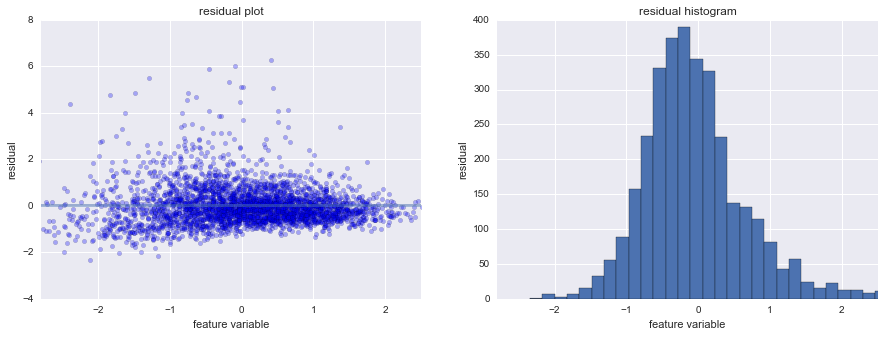

In [188]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], y_pred-y,alpha = .3)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');

# Exercise 3.5

In [198]:
totalscore = 0
for i in range(0,10):
    y = df.imdb
    ones = (df.director*0+1)
    ones = ones.rename('bias')
    X = pd.concat([ones, df.likes, df.director, df.writer, df.actor1, df.actor2, df.actor3], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = sm.OLS(y_train, X_train) 
    fit = model.fit()
    y_pred = fit.predict(X_test)
    score = metrics.r2_score(y_test, y_pred)
    print('score on iteration ' + str(i) + ': ' + str(score))
    totalscore += score
print('mean score: '+ str(totalscore/10))

score on iteration 0: 0.303308728529
score on iteration 1: 0.264465402514
score on iteration 2: 0.286512552874
score on iteration 3: 0.333746081312
score on iteration 4: 0.265829254528
score on iteration 5: 0.266592662248
score on iteration 6: 0.307226119356
score on iteration 7: 0.298380346295
score on iteration 8: 0.313707494757
score on iteration 9: 0.303102662382
mean score: 0.294287130479


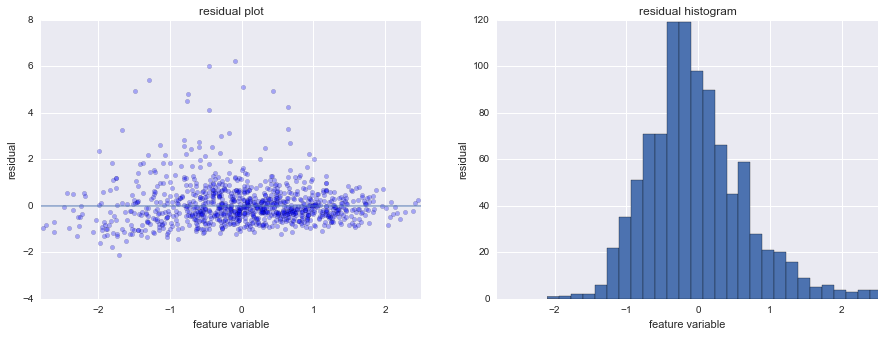

In [190]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X_test.iloc[:,1], y_pred-y_test,alpha = .3)
plt.plot(X_test.iloc[:,1],X_test.iloc[:,1]*0,alpha = .5)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y_test,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');